In [ ]:
from transient_solid_earth import (
    SolidEarthTimeDependentNumericalModel,
    SolidEarthFullNumericalModel,
)

SolidEarthTimeDependentNumericalModel(
    solid_earth_full_numerical_model=SolidEarthFullNumericalModel(),
    period=0.01,
    n=100000,
).integrate_y_i_systems(save=False)

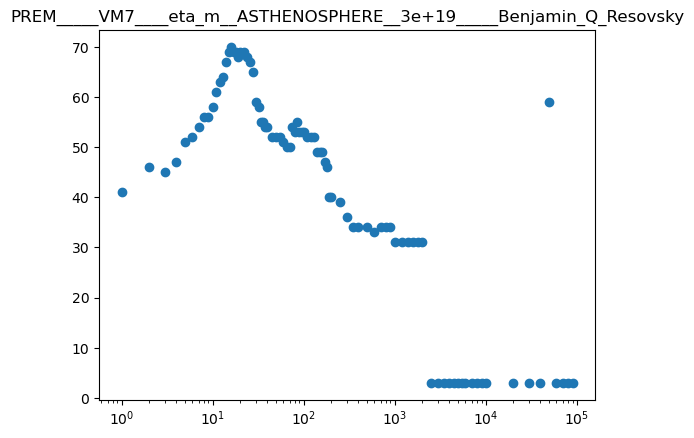

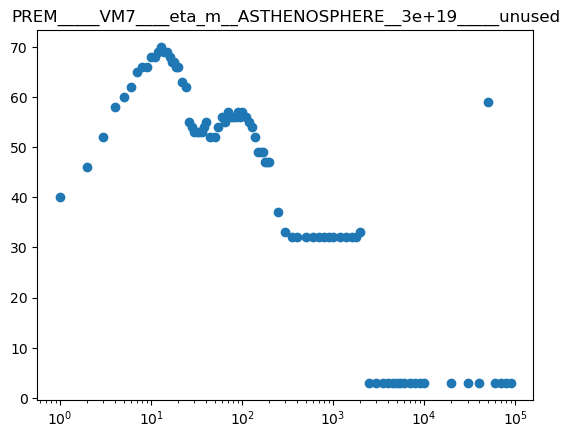

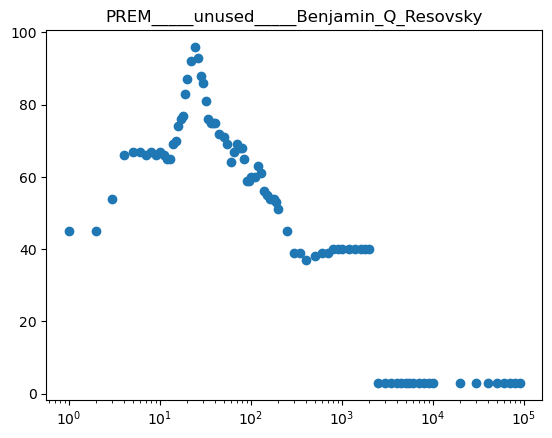

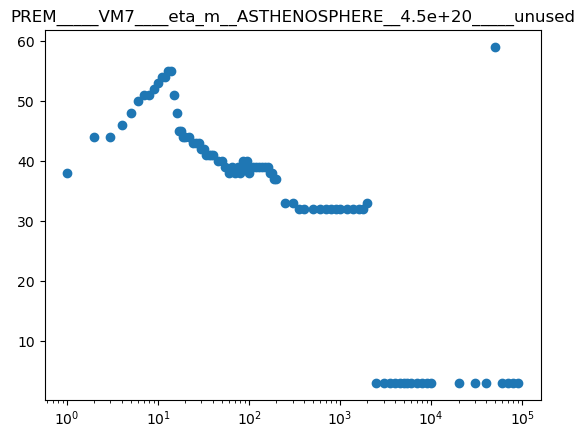

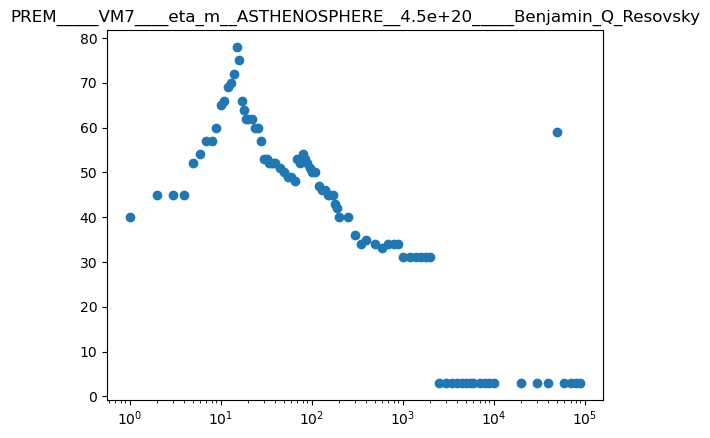

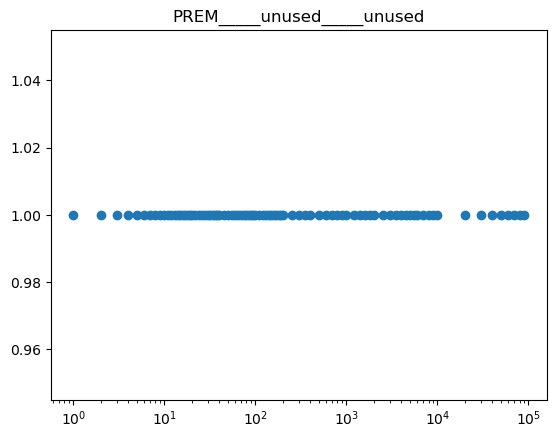

In [8]:
from pathlib import Path
from transient_solid_earth.paths import intermediate_result_subpaths

path = Path(intermediate_result_subpaths["love_numbers"])
from matplotlib.pyplot import semilogx, show, title, scatter

for model_path in path.iterdir():
    histogram = {}
    for n_path in model_path.iterdir():
        num_periods = len(
            [period_path.name for period_path in n_path.iterdir() if not period_path.is_file()]
        )
        histogram[float(n_path.name)] = num_periods
    scatter(histogram.keys(), histogram.values())
    semilogx()
    title(model_path.name)
    show()